# *AIML CA2 PART B: UNSUPERVISED LEARNING*

Background : You are running a shopping mall, and you have some data about your customers like 
Age, Gender, Income and Spending.

Through this study, we will be looking to find out 
- How to perform customer segmentation using unsupervised machine learning algorithm in Python
- Describle the different characteristics of each customer cluster
- Find out which group of customers are most valuable to the shopping mall so that the shopping mall should do something to retain them

From the background, we understand that we are to create a model which helps us clusters different types of customers.

### Importing the libaries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### Opening and accessing the dataset

In [71]:
data = pd.read_csv('Customer_Dataset.csv', index_col=0)

Using index_col helps makes the first column (Customer ID) the index. This speeds up the process of feature engineering and feature selection later as now we do not need to drop the column.

### Exploartory data analysis - analysing, exploring and cleaning the data


Presenting our data as features

In [72]:
data.head()

,Gender,Age,Income (k$),How Much They Spend
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Check for missing values, the info of the data and its statistics

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               200 non-null    object
 1   Age                  200 non-null    int64 
 2   Income (k$)          200 non-null    int64 
 3   How Much They Spend  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [74]:
data.isna().sum()

Gender                 0
Age                    0
Income (k$)            0
How Much They Spend    0
dtype: int64

In [75]:
data.describe()

,Age,Income (k$),How Much They Spend
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


From the data, we can see that there is no null data. However, there seems to be large differences between the minimum and maximum values of the Inclome(k$) column with a standard deviation of 26.26 as well as in the How Much They Spend column with a standard deviation of 25.82

### Visualising the distributions of our data

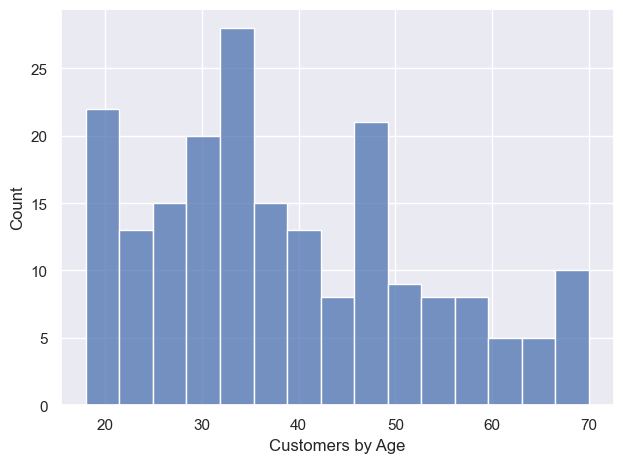

In [76]:
sns.histplot(data=data, x='Age',bins=15)
plt.xlabel('Customers by Age')

plt.tight_layout()
plt.show()

We can see that the dataset is normally distributed in terms of customers by age.

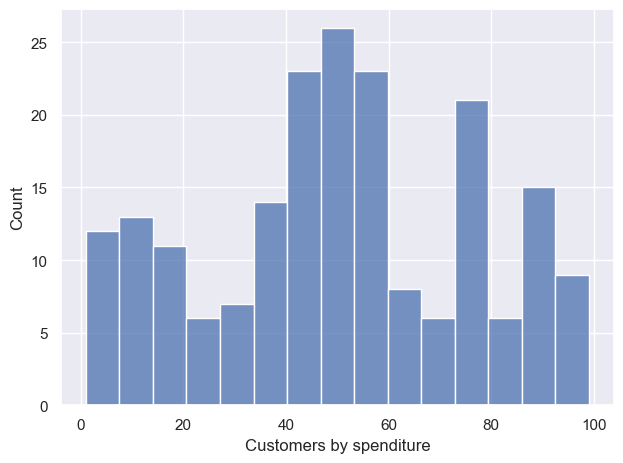

In [77]:
sns.histplot(data=data, x='How Much They Spend',bins=15)
plt.xlabel('Customers by spenditure')

plt.tight_layout()
plt.show()

We can see that the dataset is also normally distributed in terms of customers by spenditure.

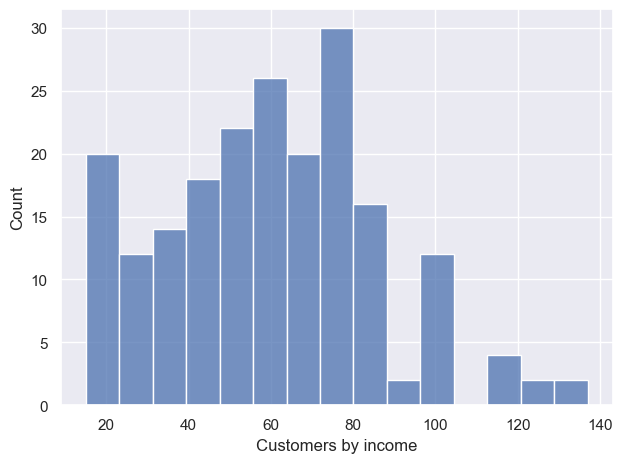

In [78]:
sns.histplot(data=data, x='Income (k$)',bins=15)
plt.xlabel('Customers by income')

plt.tight_layout()
plt.show()

We can see that the dataset is skewed to the right in terms of customers by income.

### Choosing number of clusters

We will be using the Income (k$) and How Much They Spend columns to find out the different clusters by plotting a scatter plot.

In [79]:
X =data[['Income (k$)','How Much They Spend']].values


We can use the within clusters sum of squares (WCSS) value for different number of clusters

In [80]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In order to find the most suitable number of clusters, we can plot the WCSS values to find an elbow (where the value has a sharp decline to its left and proceeds to have minimal change on its right)

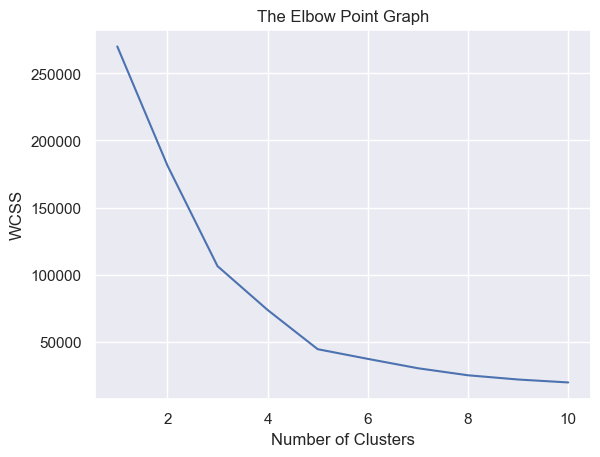

In [81]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow plot, we can see that there is little change in the WCSS value after 5 clusters. Hence, the optimal number of clusters is 5.

### Training the model

In [82]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)


c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


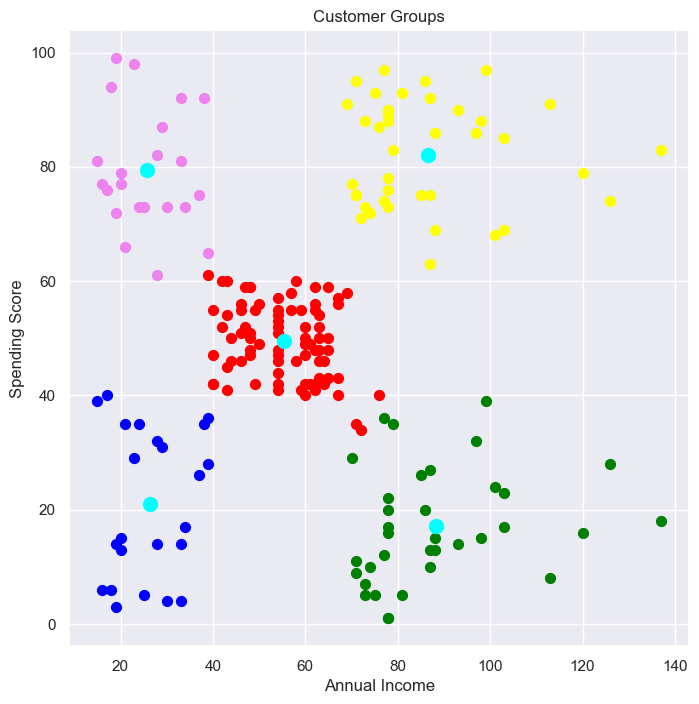

In [83]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


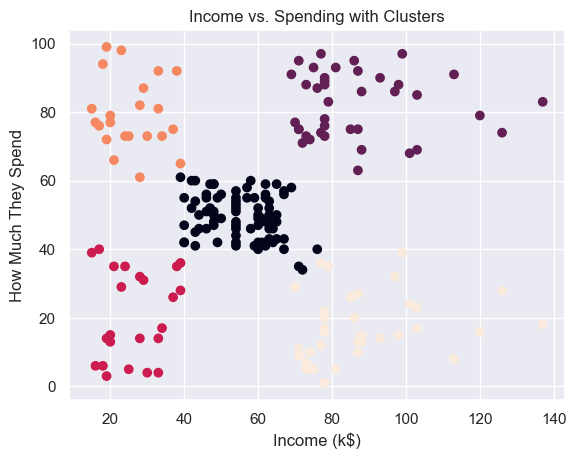

In [84]:
from sklearn.cluster import KMeans

# Create an instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=5)

# Fit the algorithm to your data
kmeans.fit(data[['Income (k$)', 'How Much They Spend']])

# Predict the cluster labels for each data point
labels = kmeans.predict(data[['Income (k$)', 'How Much They Spend']])

# Visualize the clusters
plt.scatter(data['Income (k$)'], data['How Much They Spend'], c=labels)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
plt.xlabel('Income (k$)')
plt.ylabel('How Much They Spend')
plt.title('Income vs. Spending with Clusters')
plt.show()

c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\3mm3t\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

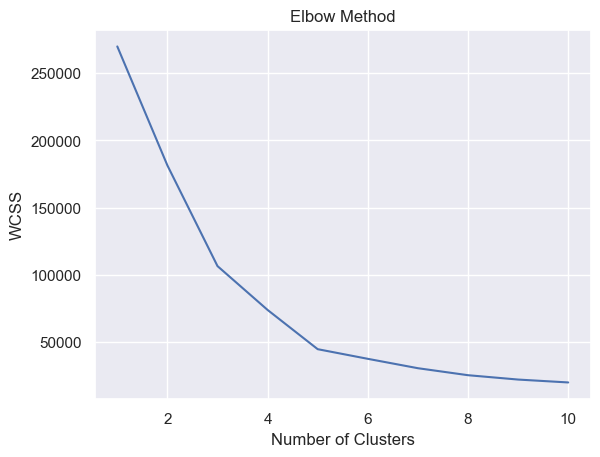

In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store the within-cluster sum of squares
wcss = []

# Fit K-means clustering for different numbers of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['Income (k$)', 'How Much They Spend']])
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [86]:
print(kmeans.inertia_)

19664.685196005543
